# Ocean Climate Analysis and Predictions
This notebook includes:
- Exploratory data analysis (EDA) on a realistic ocean climate dataset.
- Visualizations of temperature, pH, marine heatwaves, bleaching severity, and species.
- Predictive models for future Sea Surface Temperature (SST) and Coral Bleaching Severity.


# Install required packages (run only once)
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached tensorflow-2.19.0-cp39-cp39-win_amd64.whl.metadata (4.1 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.2.1-cp39-cp39-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached sci

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
# Load dataset
df = pd.read_csv("realistic_ocean_climate_dataset.csv")
print(df['Date'].dtype) 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(df['Date'].dtype)
print(df[df['Date'].isna()])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


object
datetime64[ns]
    Date            Location  Latitude  Longitude  SST (°C)  pH Level  \
2    NaT       Caribbean Sea   14.9768   -75.0233     28.86     7.947   
3    NaT  Great Barrier Reef  -18.3152   147.6486     28.97     7.995   
4    NaT           Galápagos   -0.8805   -90.9769     28.60     7.977   
7    NaT             Red Sea   19.9390    38.5104     25.56     8.042   
8    NaT            Maldives    3.2397    73.2293     28.33     8.038   
..   ...                 ...       ...        ...       ...       ...   
493  NaT    Hawaiian Islands   19.9412  -155.6210     28.56     8.083   
494  NaT  Great Barrier Reef  -18.2335   147.8174     27.32     8.005   
497  NaT       Caribbean Sea   15.0430   -75.0194     28.43     8.053   
498  NaT             Red Sea   19.9993    38.4655     27.76     8.137   
499  NaT             Red Sea   20.0407    38.4861     28.08     8.098   

    Bleaching Severity  Species Observed  Marine Heatwave  
2                 High                90 

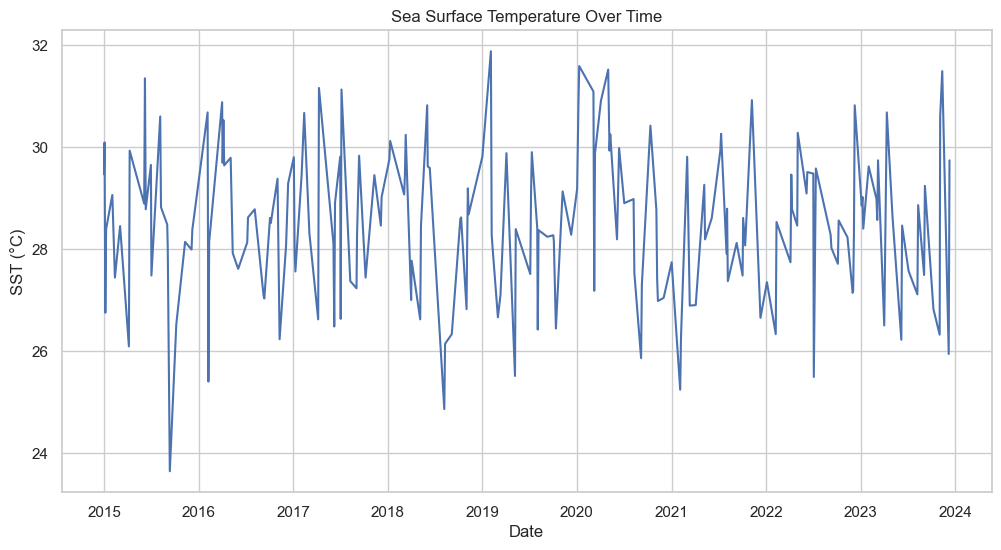

In [4]:
# SST over Time
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='SST (°C)', data=df)
plt.title('Sea Surface Temperature Over Time')
plt.ylabel('SST (°C)')
plt.show()


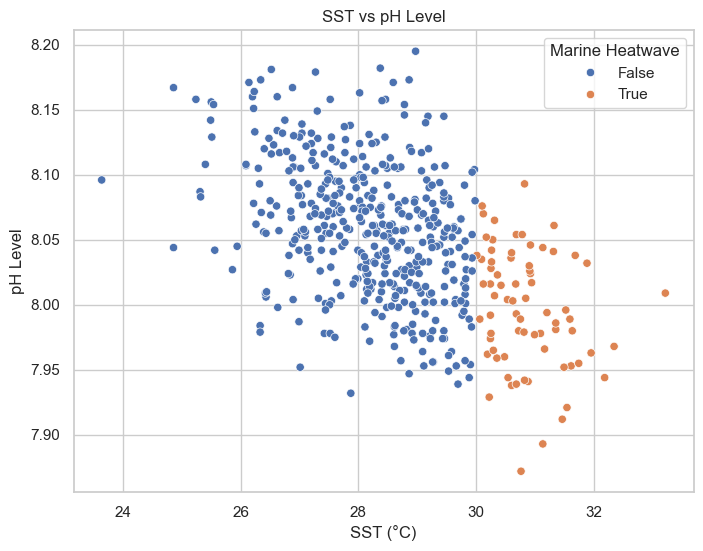

In [5]:
# SST vs pH
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SST (°C)', y='pH Level', hue='Marine Heatwave')
plt.title('SST vs pH Level')
plt.show()


C:\Users\prane\AppData\Local\Temp\ipykernel_19432\3509594191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heatwave_counts.values, y=heatwave_counts.index, palette='Reds')


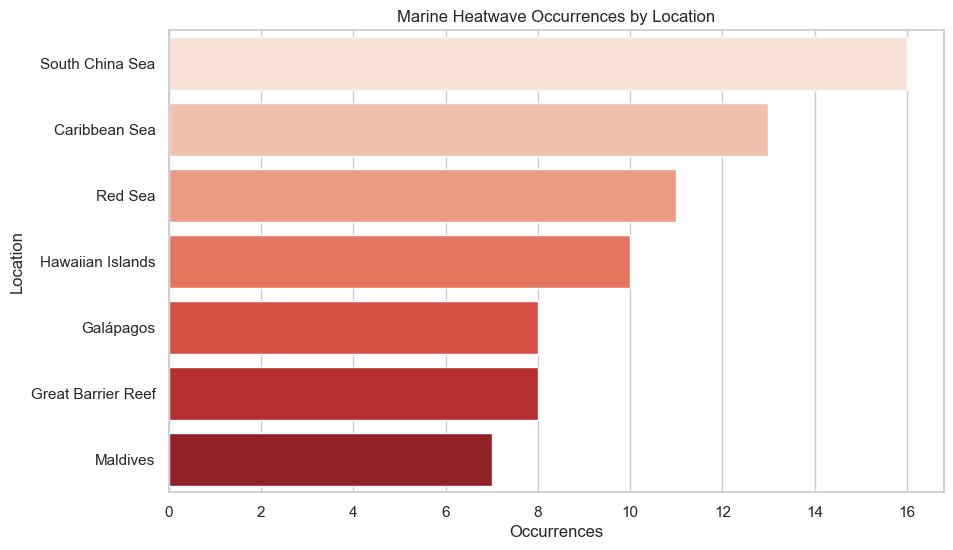

In [6]:
# Marine Heatwave Occurrences by Location
plt.figure(figsize=(10, 6))
heatwave_counts = df[df['Marine Heatwave'] == True]['Location'].value_counts()
sns.barplot(x=heatwave_counts.values, y=heatwave_counts.index, palette='Reds')
plt.title('Marine Heatwave Occurrences by Location')
plt.xlabel('Occurrences')
plt.show()


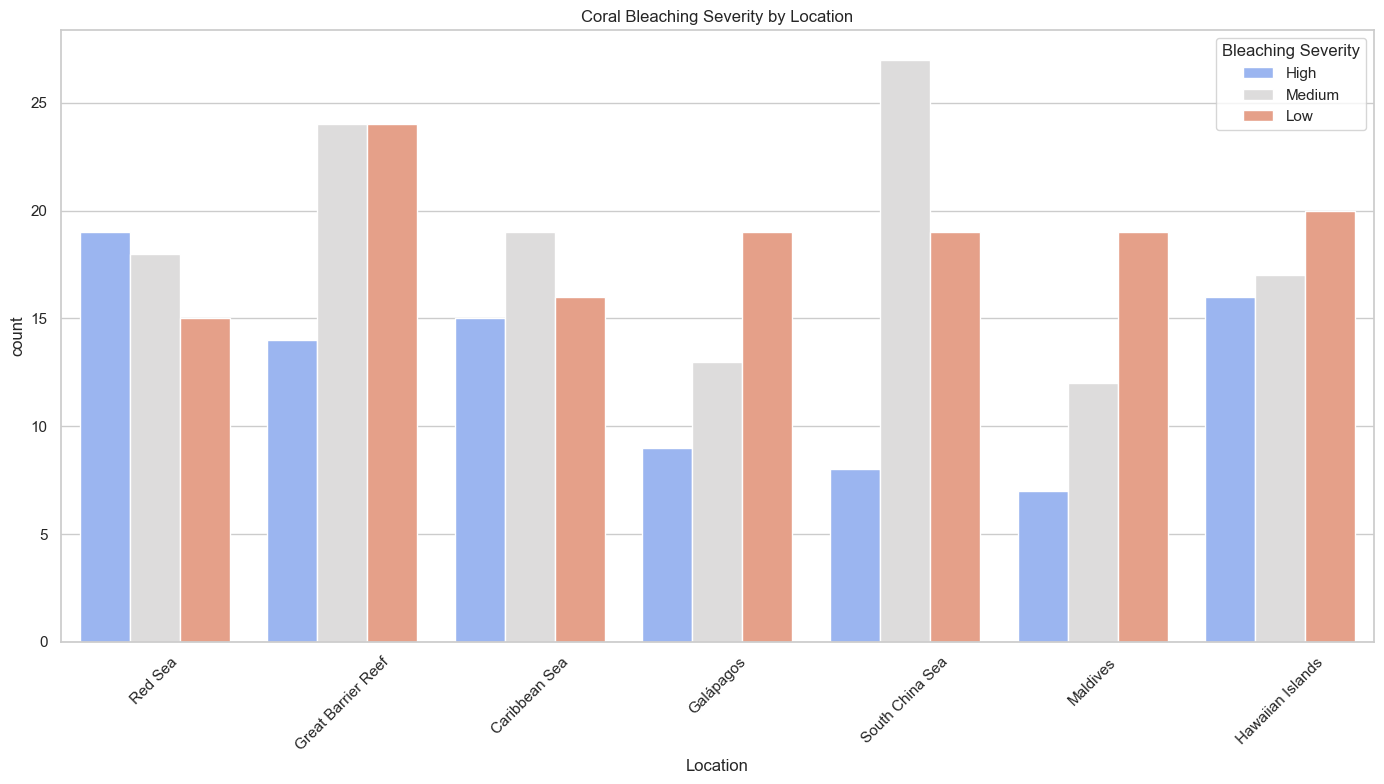

In [7]:
# Coral Bleaching Severity by Location
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Location', hue='Bleaching Severity', palette='coolwarm')
plt.title('Coral Bleaching Severity by Location')
plt.xticks(rotation=45)
plt.legend(title='Bleaching Severity')
plt.tight_layout()
plt.show()


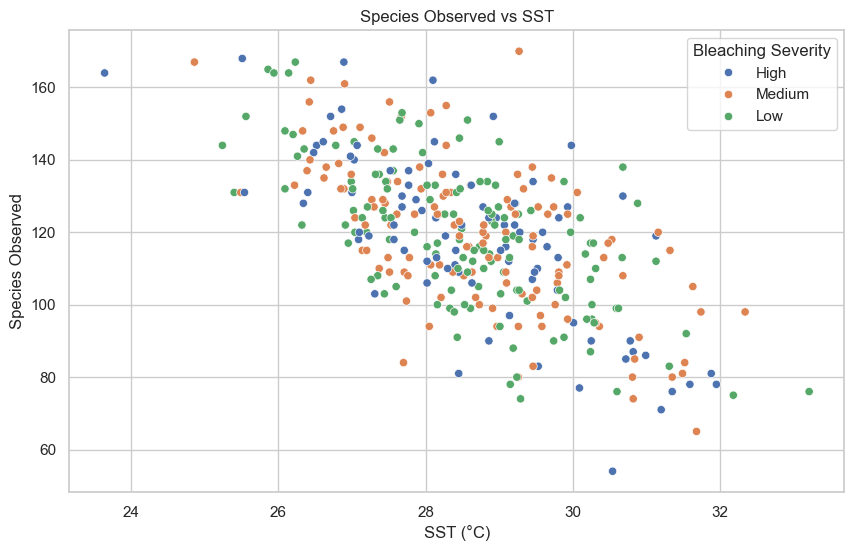

In [8]:
# Species Observed vs SST
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SST (°C)', y='Species Observed', hue='Bleaching Severity')
plt.title('Species Observed vs SST')
plt.show()


In [9]:
# Top SST Locations & Insights
top_sst = df.groupby('Location')['SST (°C)'].mean().sort_values(ascending=False).head(5)
print("Locations with highest avg SST:\n", top_sst)

print("""
Key Insights:
- Warmer sea surface temperatures correlate with lower pH values (ocean acidification).
- High bleaching severity is more common during marine heatwaves.
- Species diversity tends to decrease when SST is very high or bleaching severity increases.
""")


Locations with highest avg SST:
 Location
South China Sea       28.866986
Caribbean Sea         28.681143
Maldives              28.543333
Great Barrier Reef    28.469195
Hawaiian Islands      28.424085
Name: SST (°C), dtype: float64

Key Insights:
- Warmer sea surface temperatures correlate with lower pH values (ocean acidification).
- High bleaching severity is more common during marine heatwaves.
- Species diversity tends to decrease when SST is very high or bleaching severity increases.



In [11]:
# --- Predicting Coral Bleaching Severity (Classification Task) ---
df_bleach = df.dropna(subset=['SST (°C)', 'pH Level', 'Species Observed', 'Bleaching Severity'])
df_bleach['Bleaching Severity Encoded'] = df_bleach['Bleaching Severity'].astype('category').cat.codes
Xb = df_bleach[['SST (°C)', 'pH Level', 'Species Observed', 'Year', 'Month']]
yb = df_bleach['Bleaching Severity Encoded']
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)
Xb_train_scaled = scaler.fit_transform(Xb_train)
Xb_test_scaled = scaler.transform(Xb_test)
clf = RandomForestClassifier()
clf.fit(Xb_train_scaled, yb_train)
yb_pred = clf.predict(Xb_test_scaled)
print("---- Coral Bleaching Prediction ----")
print("Accuracy:", accuracy_score(yb_test, yb_pred))
print("Classification Report:\n", classification_report(yb_test, yb_pred))


C:\Users\prane\AppData\Local\Temp\ipykernel_19432\356666831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bleach['Bleaching Severity Encoded'] = df_bleach['Bleaching Severity'].astype('category').cat.codes


---- Coral Bleaching Prediction ----
Accuracy: 0.22857142857142856
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.07      0.07        14
           1       0.38      0.25      0.30        32
           2       0.21      0.29      0.24        24

    accuracy                           0.23        70
   macro avg       0.22      0.20      0.20        70
weighted avg       0.26      0.23      0.23        70



Date                   0
Location               0
Latitude               0
Longitude              0
SST (°C)               0
pH Level               0
Bleaching Severity    54
Species Observed       0
Marine Heatwave        0
Year                   0
Month                  0
dtype: int64
---- SST Prediction Performance ----
Mean Squared Error: 1.1031182640667203
R2 Score: 0.49510166311473913

---- Future SST Predictions (2025-2026) ----
         Date  Predicted SST (°C)
0  2025-01-01           28.779418
1  2025-02-01           28.729458
2  2025-03-01           28.679498
3  2025-04-01           28.629538
4  2025-05-01           28.579578
5  2025-06-01           28.529617
6  2025-07-01           28.479657
7  2025-08-01           28.429697
8  2025-09-01           28.379737
9  2025-10-01           28.329777
10 2025-11-01           28.279817
11 2025-12-01           28.229856
12 2026-01-01           28.767728
13 2026-02-01           28.717768
14 2026-03-01           28.667808
15 2026-04-01   

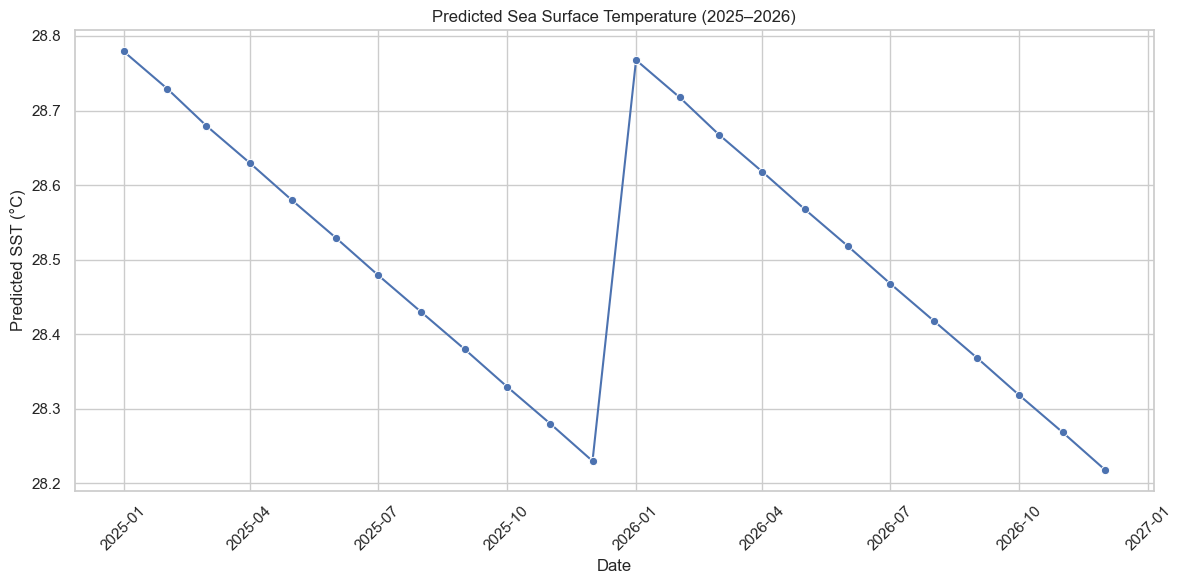

In [16]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Load Data ---
df = pd.read_csv("realistic_ocean_climate_dataset.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# --- Prepare Data for SST Regression ---
df_sst = df.dropna(subset=['SST (°C)', 'pH Level', 'Species Observed', 'Year', 'Month'])
X = df_sst[['pH Level', 'Species Observed', 'Year', 'Month']]
y = df_sst['SST (°C)']
print(df_sst.isna().sum())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = reg_model.predict(X_test_scaled)

print("---- SST Prediction Performance ----")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# --- Future SST Prediction for 2025 and 2026 ---
mean_ph = df['pH Level'].mean()
mean_species = df['Species Observed'].mean()

future_years = [2025, 2026]
future_months = list(range(1, 13))
future_data = []

for year in future_years:
    for month in future_months:
        future_data.append([mean_ph, mean_species, year, month])

# Use same columns as training features
future_df = pd.DataFrame(future_data, columns=X.columns)

# Scale future features
future_scaled = scaler.transform(future_df)

# Predict SST for future data
future_predictions = reg_model.predict(future_scaled)
future_df['Predicted SST (°C)'] = future_predictions

# Add datetime for plotting
future_df['Date'] = pd.to_datetime(future_df[['Year', 'Month']].assign(DAY=1))

# Print future predictions
print("\n---- Future SST Predictions (2025-2026) ----")
print(future_df[['Date', 'Predicted SST (°C)']])


# Plot future predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Predicted SST (°C)', data=future_df, marker='o')
plt.title('Predicted Sea Surface Temperature (2025–2026)')
plt.ylabel('Predicted SST (°C)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
